# Ceneo Analyzer

## Imports

In [228]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected

In [229]:
print(*[filename.split('.')[0] for filename in os.listdir('opinions')], sep='\n')


108290707
47522099


## Get a code of product about which opinions are to analyze

In [230]:
product_id = input("Enter product code: ")

## Read opinions from JSON file to pandas.DataFrame

In [231]:
MAX_SCORE = 5
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.score = opinions.score.apply(lambda s: round(s*MAX_SCORE, 1))

## Basic statistics

In [232]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_scorer = (opinions.score.mean()*MAX_SCORE).round(3)
average_scorer

20.978

## Basic charts

# Opinions score histogram

[Text(0, 0, '0.0'),
 Text(1, 0, '0.5'),
 Text(2, 0, '1.0'),
 Text(3, 0, '1.5'),
 Text(4, 0, '2.0'),
 Text(5, 0, '2.5'),
 Text(6, 0, '3.0'),
 Text(7, 0, '3.5'),
 Text(8, 0, '4.0'),
 Text(9, 0, '4.5'),
 Text(10, 0, '5.0')]

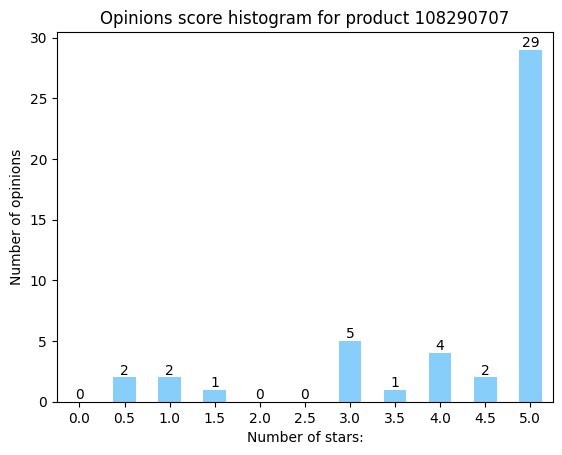

In [233]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color="lightskyblue")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if 1 > 0 else '')
ax.set_xlabel("Number of stars:")
ax.set_ylabel("Number of opinions")
ax.set_title(f"Opinions score histogram for product {product_id}")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

## Opinions recommendations share

Text(0.5, 1.0, 'Opinions recommendations share for product 108290707')

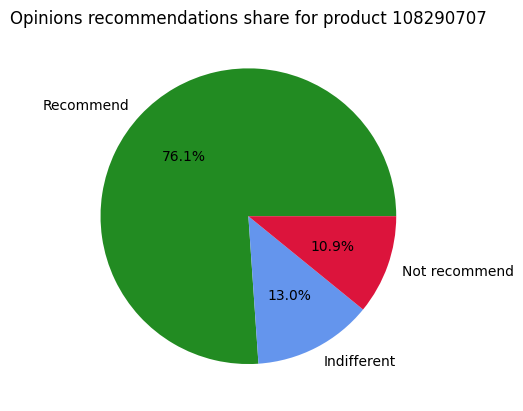

In [234]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
fig, ax = plt.subplots()
recommendation_distribution.plot.pie(
    autopct = "%1.1f%%",
    labels = ["Recommend", "Indifferent", "Not recommend"],
    colors = ['forestgreen', 'cornflowerblue', "crimson"],
    label = ''
)
ax.set_title(f"Opinions recommendations share for product {product_id}")